 1. 2D function Let the function be f(x) = x**2 + 3x + 2
Use the gradient descent algorithm to find the minima of this function.

THE MINIMA LIES ON -1.5000000017314805 and the value of the function at the minima is -0.24999999999999956


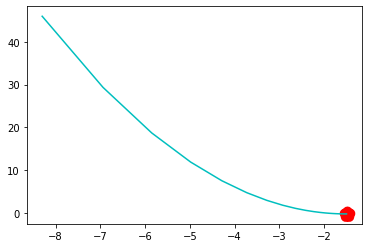

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x=-10
learn_rate=.1
def func(x):     #Defining for calculating functiion mag at diff time
    f=x**2+3*x+2
    return(f)

def diff_func(x):   #Differenciating funtion 
    df=2*x+3
    return(df)

def grad_min(x,learn_rate):
    list=[]
    mist=[]
    for i in range(100):
        x_curr=x
        x_curr=x_curr-learn_rate*(diff_func(x_curr))   #use of gradient descent
        f_val=func(x_curr)
        x=x_curr
        list.append(x_curr)
        mist.append(f_val)
        
    return list,mist   #list has the location while the mist has function value
a=grad_min(x,learn_rate)
print("THE MINIMA LIES ON",a[0][-1],"and the value of the function at the minima is",a[1][-1])


plt.plot(a[0],a[1],color="c")

plt.scatter(a[0][-1],a[1][-1],marker="*",color="r",linewidth="10")

2. 3D function Let the function be f(x1; x2) = x1^2+ x2^2 Minimize this function using the gradient descent algorithm.

In [35]:
from matplotlib import cm 
from mpl_toolkits.mplot3d import axes3d


x1=-10
x2=-56
learn_rate=.2
def func(x1,x2):    #defining function
    f=x1**2 +x2**2
    return(f)

def diff_func(x1,x2):   #defing derivative of the funcions
    df1=2*x1
    df2=2*x2
    return(df1,df2)



def grad_min(x1,x2,learn_rate):
    list=[]    #containg the l
    mist=[]
    rist=[]
    for i in range(200):
        x_curr1=x1
        x_curr2=x2
        b=diff_func(x_curr1,x_curr2)
        x_curr1=x_curr1-learn_rate*(b[0])   #use of gradient descent
        x_curr2=x_curr2-learn_rate*(b[1]) 
        f_val=func(x_curr1,x_curr2)
        x1=x_curr1
        x2=x_curr2
        list.append(x1)
        mist.append(f_val)
        rist.append(x2)
    return list,rist,mist
a=grad_min(x1,x2,learn_rate)

a=np.array(a)
print("THE MINIMA LIES ON",(a[0][-1],a[1][-1]),"and the value of the function at the minima is",a[2][-1])


THE MINIMA LIES ON (-4.268252238120242e-44, -2.3902212533473376e-43) and the value of the function at the minima is 5.895337411635502e-86


3. Boolean Function Learning Consider the boolean functions:
y = f(x1; x2) = x1.x2 

y = f(x1; x2) = x1 xor x2

Train a Perceptron with 2 inputs, and 1 output to learn these functions.
Use the threshold according to the function. Use the Perceptron Learning
Algorithm for this. Plot the data points with the 2 output classes(True and
False) and the boundary that you learnt using the Perceptron Learning
Algorithm.

Iteration:0, error:0.226310
Iteration:100, error:0.076944
Iteration:200, error:0.036311
Iteration:300, error:0.020992
Iteration:400, error:0.013597


<IPython.core.display.Javascript object>


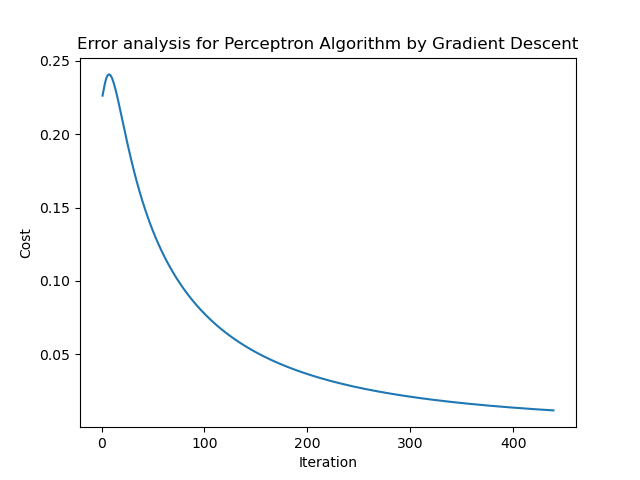

<IPython.core.display.Javascript object>


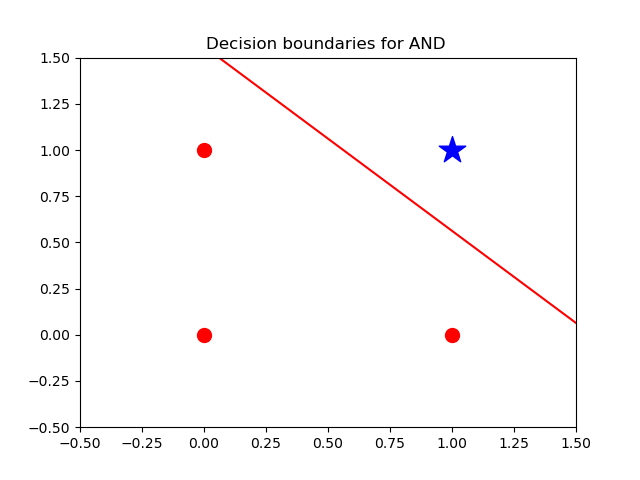

In [57]:
import matplotlib.pyplot as plt
import math



inti_wt = np.random.randn(1,3) # Weight vector as we are coding for a gernal case
inp_vec = np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]]) #Input vector
Z = inp_vec.T
out_tar= np.array([0,0,0,1]) #Target ouputs
act_out = np.matmul(inti_wt,Z).flatten()  #  Actual outputs
cost = []


#Activation Function
def sigmoid(p):
    return 1/(1+math.exp(-p))

def sig_d(q):
    return sigmoid(q)*(1-sigmoid(q))

learn_rate = .50           #Learning rate
no_itt = 439                  # iterations

for i in range(no_itt):
    k=0   
    for m in range(4):
        act_out = sigmoid(np.matmul(inti_wt,Z[:,m])) # estimate Target out
        inti_wt=inti_wt - learn_rate*(act_out-out_tar[m])*sig_d(act_out)*Z[:,m] # Updation of Gradient Descent
        
        k = (k + (act_out-out_tar[m])**2)/2 # error estimation
    if i%100 == 0:
        print("Iteration:%d, error:%f" %(i,k))
    cost.append(k)

        
        
        
plt.figure()

#Visuals
plt.plot(np.linspace(1,len(cost),len(cost)),cost)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Error analysis for Perceptron Algorithm by Gradient Descent")
plt.show()

plt.figure()
#training sample
plt.scatter(0,0,marker='.',color='r',s=400)
plt.scatter(0,1,marker='.',color='r',s=400)
plt.scatter(1,0,marker='.',color='r',s=400)
plt.scatter(1,1,marker='*',color='b',s=400)


#Decision surfaces
x = np.arange(-1,40,1)
y = (-inti_wt[0][0] - inti_wt[0][2]*x)/inti_wt[0][1]
plt.plot(x,y,color='r')
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.title("Decision boundaries for AND ")
plt.show()